In [ ]:
# 🔥 Classification of Fire Types in India Using MODIS Satellite Data
# Week 1 - Data Loading, Preprocessing, EDA, Confidence Distribution

# ✅ Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
print("Libraries imported!")


Libraries imported!


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving modis_2021_India.csv to modis_2021_India.csv
Saving modis_2022_India.csv to modis_2022_India.csv
Saving modis_2023_India.csv to modis_2023_India.csv


In [ ]:
# Load CSVs
df_2021 = pd.read_csv("modis_2021_India.csv")
df_2022 = pd.read_csv("modis_2022_India.csv")
df_2023 = pd.read_csv("modis_2023_India.csv")

print("2021:", df_2021.shape, " | 2022:", df_2022.shape, " | 2023:", df_2023.shape)


2021: (111267, 15)  | 2022: (81525, 15)  | 2023: (78425, 15)


In [ ]:
# Add year column
df_2021["year"] = 2021
df_2022["year"] = 2022
df_2023["year"] = 2023

# Merge all years
df = pd.concat([df_2021, df_2022, df_2023], ignore_index=True)
print("Combined Shape:", df.shape)
df.head()


Combined Shape: (271217, 16)


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,year
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0,2021
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0,2021
2,30.0879,78.8579,300.2,1.3,1.1,2021-01-01,547,Terra,MODIS,8,6.03,286.5,5.4,D,0,2021
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0,2021
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0,2021


In [ ]:
# Drop duplicates
df = df.drop_duplicates()
print("After dropping duplicates:", df.shape)

# Check for missing values
print(df.isnull().sum())


After dropping duplicates: (271217, 16)
latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
year          0
dtype: int64


In [ ]:
columns_to_drop = ['version', 'instrument', 'satellite', 'scan', 'track']

df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

print("Remaining columns:\n", df.columns.tolist())


Remaining columns:
 ['latitude', 'longitude', 'brightness', 'acq_date', 'acq_time', 'confidence', 'bright_t31', 'frp', 'daynight', 'type', 'year']


In [ ]:
# Check unique confidence values
print(df['confidence'].unique())

confidence_map = {'low': 0, 'nominal': 1, 'high': 2}

if df['confidence'].dtype == object:
    df['confidence_encoded'] = df['confidence'].map(confidence_map)
else:
    df['confidence_encoded'] = df['confidence']


[ 44  37   8  46  43  56  36  33  23  35  59  61  39  72  64  51  57  62
  82  60  54   0  50  58  52  75  71  63  41  48  67  81  55  66  76  49
  73  65  31  45  69  96  53  68  84  29  17  21  18  70  47  97  83  22
  42  78  92 100  95  85  89  74  77  79  19  93  87  98  32  24  26  40
  80  34  90  88  99  27  86   5  94  30  38  28  91  16   3  12  15   1
  20  14  10  11  13  25   6   9   7   4   2]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


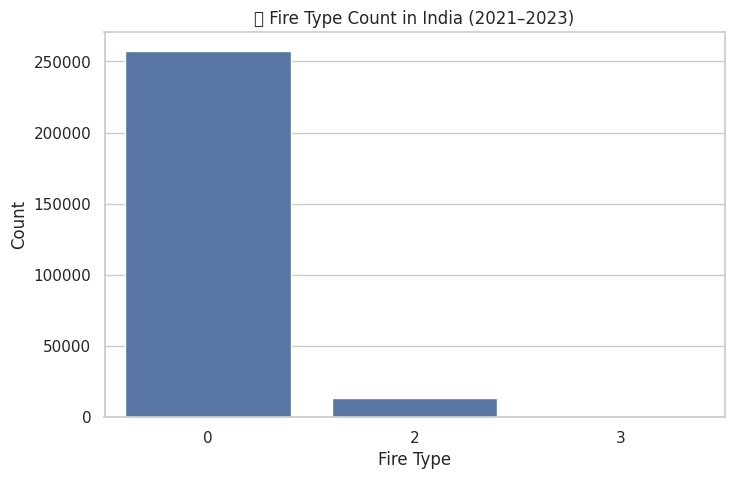

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='type', data=df)
plt.title("🔥 Fire Type Count in India (2021–2023)")
plt.xlabel("Fire Type")
plt.ylabel("Count")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


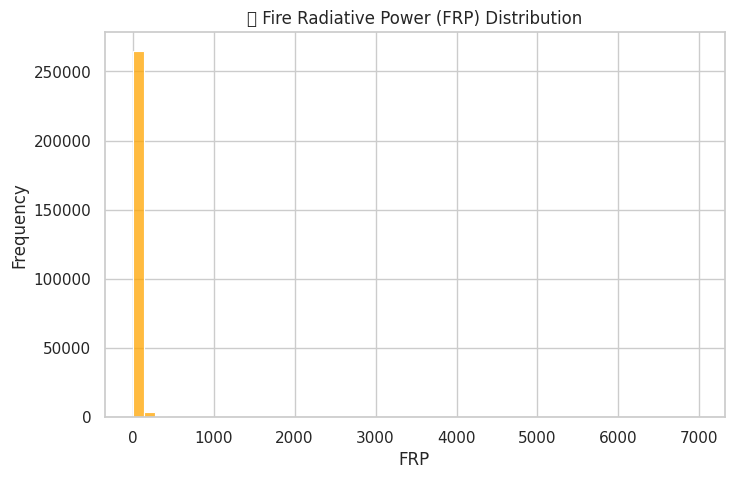

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['frp'], bins=50, color='orange')
plt.title("🔥 Fire Radiative Power (FRP) Distribution")
plt.xlabel("FRP")
plt.ylabel("Frequency")
plt.show()


/tmp/ipython-input-10-574593269.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='confidence', data=df, palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129000 (\N{LARGE YELLOW SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


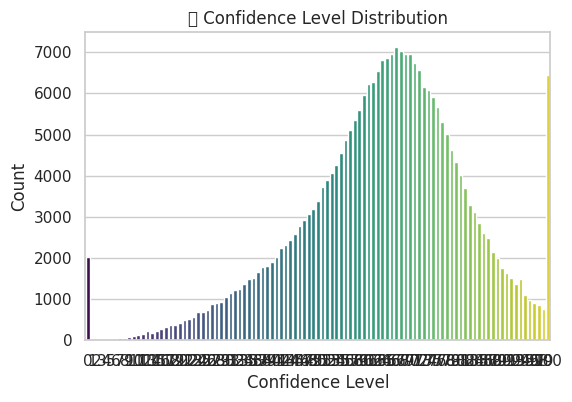

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='confidence', data=df, palette='viridis')
plt.title("🟨 Confidence Level Distribution")
plt.xlabel("Confidence Level")
plt.ylabel("Count")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129000 (\N{LARGE YELLOW SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


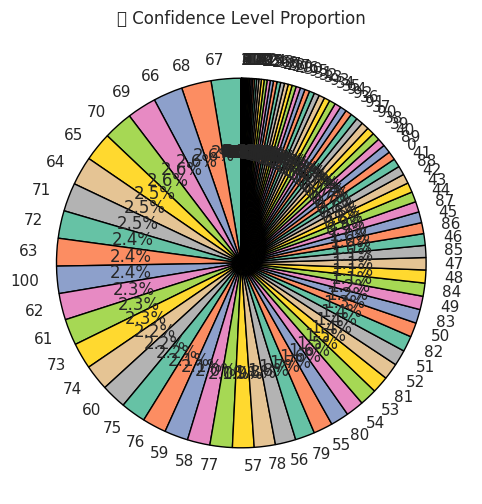

In [ ]:
plt.figure(figsize=(6,6))
df['confidence'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('Set2'),
    wedgeprops={'edgecolor': 'black'}
)
plt.title("🟨 Confidence Level Proportion")
plt.ylabel("")
plt.show()


In [ ]:
df.to_csv("cleaned_modis_data.csv", index=False)
print("✅ Cleaned data saved as cleaned_modis_data.csv")


✅ Cleaned data saved as cleaned_modis_data.csv
